In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import pickle

In [ ]:
df= pd.read_csv('../csv/after_cleaning/mubawab_tayara_menzili_final.csv')
df.head()

,delegation,superficie,nb_pieces,chambres,salle_de_bains,etage,gouvernorat_ariana,gouvernorat_ben-arous,gouvernorat_la-manouba,gouvernorat_tunis,prix
0,9.0,88.0,3.0,2,1,1,0.0,0.0,0.0,1.0,340000.0
1,23.0,100.0,2.0,2,1,1,0.0,0.0,0.0,1.0,135000.0
2,33.0,152.0,2.0,2,1,1,0.0,0.0,0.0,1.0,680000.0
3,33.0,120.0,2.0,1,1,1,0.0,0.0,0.0,1.0,470000.0
4,28.0,145.0,4.0,3,1,4,0.0,0.0,0.0,1.0,260000.0


**train test split**

NOTE: Tree-based models are not affected by the scale of features because they split based on feature thresholds

In [4]:
X= df.drop(columns='prix')

y= df['prix']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

**parameters tuning**

In [5]:

# Hyperparameters to tune
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'n_estimators': [10, 50, 100, 200]
}

# Grid Search
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)


Fitting 10 folds for each of 720 candidates, totalling 7200 fits


/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1800 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
532 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train,

Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best CV score: 0.7012021376425157


In [6]:
model= RandomForestRegressor(**grid_search.best_params_, oob_score= True)
model.fit(X_train, y_train)

y_hat= model.predict(X_test)

In [7]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
mape=mean_absolute_percentage_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R²: {r2}")

Mean Absolute Error (MAE): 98067.72696474663
Root Mean Squared Error (RMSE): 157615.91894545095
Mean Squared Error (MSE): 24842777905.018967
Mean Absolute Percentage Error (MAPE): 0.2680443314222973
R²: 0.7921853833362767


In [8]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Train metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display results
print("===== Training Metrics =====")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\n===== Testing Metrics =====")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.4f}")
print(f"R²: {r2_test:.4f}")


===== Training Metrics =====
Mean Absolute Error (MAE): 75594.4952
Root Mean Squared Error (RMSE): 150558.9541
Mean Squared Error (MSE): 22667998663.8665
Mean Absolute Percentage Error (MAPE): 0.1981
R²: 0.8266

===== Testing Metrics =====
Mean Absolute Error (MAE): 98067.7270
Root Mean Squared Error (RMSE): 157615.9189
Mean Squared Error (MSE): 24842777905.0190
Mean Absolute Percentage Error (MAPE): 0.2680
R²: 0.7922


**R² is around 80% , this means that model explains about 80% of the variance in apartment prices.
The higher the R², the better the model’s fit to the data.**

**cross validation**

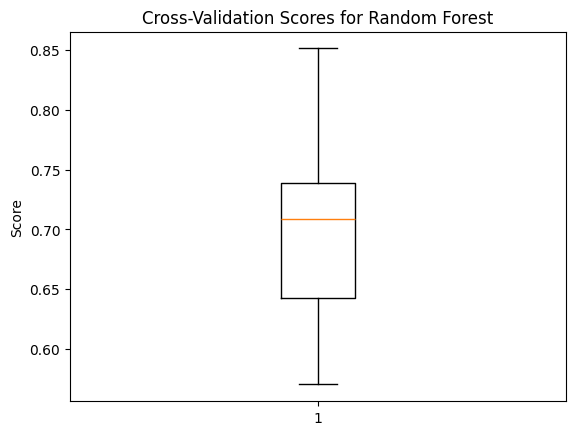

Average CV Score: 0.6995980198083848


In [10]:
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

# Plotting the cross-validation scores
plt.boxplot(cv_scores)
plt.title('Cross-Validation Scores for Random Forest')
plt.ylabel('Score')
plt.show()

print(f'Average CV Score: {cv_scores.mean()}')


**around 70% accuracy**

**OOB: out of bag error**

In [11]:
# OOB error score
print(f"OOB Score: {model.oob_score_}")

OOB Score: 0.6883515258519999


**learning curve**

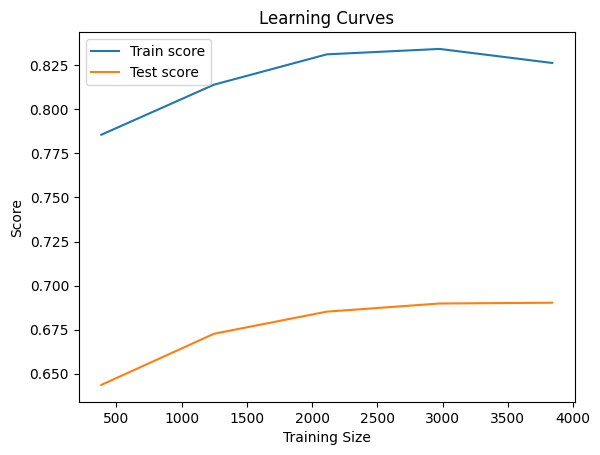

In [12]:

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()


The test score starts low but increases as the training size increases, which suggests that adding more data improves generalization.
 
There is still a noticeable gap between train and test scores, indicating that the model may be slightly overfitting.


**compressed model**

In [13]:
# save object to pickle file
with open(r"./compressed_models/RF_model.pickle", "wb") as fout:
    pickle.dump(model, fout)


In [14]:
# open pickle file and load
with open(r"./compressed_models/RF_model.pickle", "rb") as fin:
    RF = pickle.load(fin)
# display loaded object
print(RF)


RandomForestRegressor(max_features='log2', min_samples_split=10,
                      n_estimators=200, oob_score=True)


In [15]:
RF.predict(X_test)

array([319175.21454671, 318791.47247896, 355263.03991826, ...,
       989884.00545703, 815552.22163908, 154220.87642123])